In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data In

In [3]:
# loading in CAHOOTS data from 2021 and 2022
call_data_21_22 = pd.read_csv("call_data_from_CAHOOTS_2021_2022.csv")
#no_na_call_data_21_22 = call_data_21_22.dropna()
call_data_21_22

,Date,TimeOfCall,Age,Gender,Race,Language,City,Reason for Dispatch
0,12/7/22,1:28:00,16,Male,Chose not to Disclose,English,Eugene,Counseling
1,11/10/22,13:12:00,55,Male,White,English,Eugene,Police Assist
2,1/20/21,17:25:01,53,Male,White,English,Eugene,Public Assist
3,1/20/21,21:34:01,32,Female,White,English,Eugene,Public Assist
4,1/20/21,22:10:30,50,Male,Black or African American,English,Eugene,Public Assist
...,...,...,...,...,...,...,...,...
47946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# loading in CAHOOTS data from 2023
call_data_2023 = pd.read_csv("call_data_from_CAHOOTS.csv")
call_data_2023

,Date,TimeOfCall,Age,Gender,Race,Language,City,Reason for Dispatch
0,1/1/23,0:05:33,57,Female,White,English,Eugene,Public Assist
1,1/1/23,0:05:00,Not Given,Male,NaN,English,Eugene,Check Welfare
2,1/1/23,1:09:51,Not Given,Female,NaN,English,Eugene,Information Not Available
3,1/1/23,1:33:15,Not Given,Female,NaN,English,Eugene,Public Assist
4,1/1/23,1:45:30,67,Female,White,English,Eugene,Public Assist
...,...,...,...,...,...,...,...,...
19565,12/31/23,9:33:35 PM,Not Given,Chose not to disclose,White,English,Springfield,Information Not Available
19566,12/31/23,9:51:35 PM,Not Given,Chose not to disclose,NaN,English,Informatio not recorded,Information Not Available
19567,12/31/23,9:58:10 PM,17,Chose not to disclose,White,English,Eugene,Information Not Available
19568,12/31/23,10:15:00 PM,17,Chose not to disclose,White,English,Eugene,Information Not Available


# Merging 2021, 2022, and 2023 Data

In [6]:
# merging the CAHOOTS 2021, 2022, and 2023 data
CAHOOTS_call_data = call_data_21_22.merge(call_data_2023, how="outer")
CAHOOTS_call_data

,Date,TimeOfCall,Age,Gender,Race,Language,City,Reason for Dispatch
0,1/1/22,0:11:00,46,Male,White,English,Eugene,Public Assist
1,1/1/22,0:26:16,55,Male,White,English,Eugene,Public Assist
2,1/1/22,10:10:33,Unavailable,Male,Chose not to Disclose,English,Eugene,Public Assist
3,1/1/22,10:30:02,81,Female,White,English,Eugene,Transport
4,1/1/22,11:08:33,51,Male,White,English,Eugene,Check Welfare
...,...,...,...,...,...,...,...,...
67516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploring Where There are NA values/if there are any patterns

In [8]:
import pandas as pd

# drop columns I don't need
cahoots_age_rfd_nas = CAHOOTS_call_data.drop(["TimeOfCall", "Gender", "Race", "Language", "City", "Date"], axis=1).copy()

# Replace 'Unavailable' and 'Not Given' with 'NA'
cahoots_age_rfd_nas['Age'] = cahoots_age_rfd_nas['Age'].fillna("NA").replace(["Not Given", "Unavailable"], "NA")

# removing weird characters
cahoots_age_rfd_nas['Reason for Dispatch'] = cahoots_age_rfd_nas['Reason for Dispatch'].replace(r'Check Welfare\x0b', 'Check Welfare', regex=True)

# Filter for 'NA' values in the 'Age' column
na_ages = cahoots_age_rfd_nas[cahoots_age_rfd_nas['Age'] == "NA"]

# Group by 'Reason for Dispatch' and count 'NA' entries
na_counts = na_ages.groupby('Reason for Dispatch').size()

#converting to df
na_counts_df = na_counts.reset_index(name='NA Count')

na_counts_df

,Reason for Dispatch,NA Count
0,Check Welfare,15485
1,Counseling,200
2,EMS Assist,79
3,Fire Assist,133
4,Information Not Available,2373
5,Police Assist,1250
6,Public Assist,8628
7,Suicidal Subject,473
8,Transport,622


In [9]:
# Calculate total counts per 'Reason for Dispatch'
total_counts = cahoots_age_rfd_nas.groupby('Reason for Dispatch').size()

# Create a DataFrame with both total and NA counts
summary_df = pd.DataFrame({
    'Total Counts': total_counts,
    'NA Counts': na_counts
}).fillna(0)  # Ensure that NA counts are filled with 0 where there are no NA values

# Calculate the proportion of NAs
summary_df['Proportion NA'] = (summary_df['NA Counts'] / summary_df['Total Counts']) * 100

summary_df

,Total Counts,NA Counts,Proportion NA
Reason for Dispatch,,,
Check Welfare,29097,15485,53.218545
Counseling,860,200,23.255814
EMS Assist,311,79,25.401929
Fire Assist,336,133,39.583333
Information Not Available,4006,2373,59.236146
Police Assist,5356,1250,23.338312
Public Assist,22786,8628,37.865356
Suicidal Subject,1922,473,24.609781
Transport,1797,622,34.613244


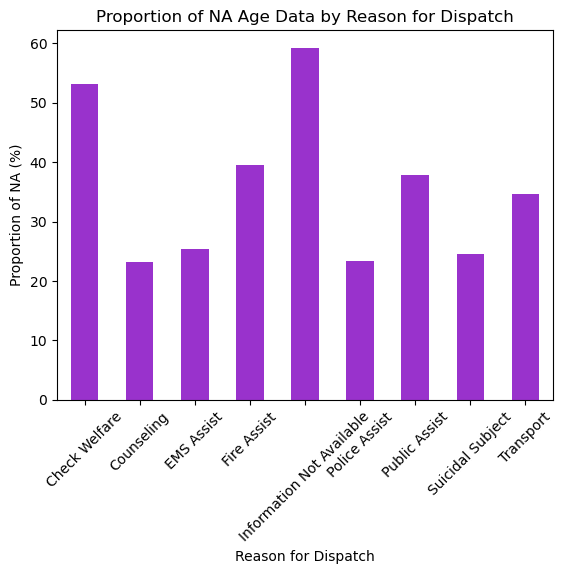

In [10]:
summary_df['Proportion NA'].plot(kind='bar', color='darkorchid')
plt.title('Proportion of NA Age Data by Reason for Dispatch')
plt.xlabel('Reason for Dispatch')
plt.ylabel('Proportion of NA (%)')
plt.xticks(rotation=45)
plt.show()

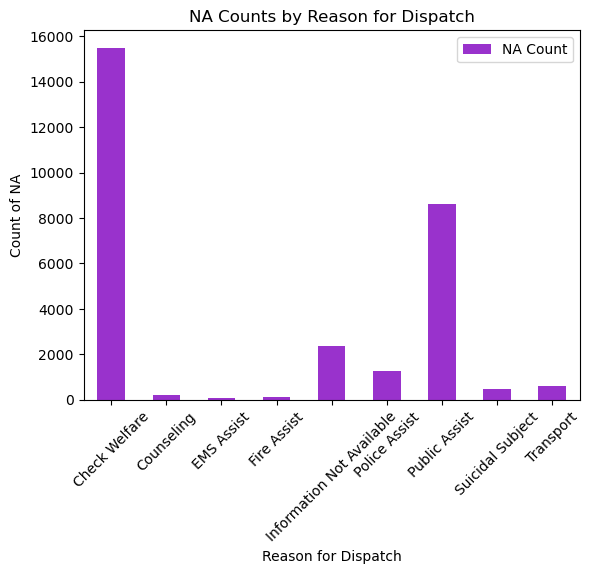

In [11]:
na_counts_df.plot(kind='bar', x='Reason for Dispatch', y='NA Count', color='darkorchid')
plt.title('NA Counts by Reason for Dispatch')
plt.xlabel('Reason for Dispatch')
plt.ylabel('Count of NA')
plt.xticks(rotation=45)
plt.show()

# Just Age Dataframe

In [13]:
# dropping the columns I don't need 
    # first dataframe I'm making is just age 
CAHOOTS_age_all = CAHOOTS_call_data.drop(["Date", "TimeOfCall", "Gender", "Race", "Language", "City", "Reason for Dispatch"], axis=1)

# now dropping the values of "Not Given" 
    # https://saturncloud.io/blog/how-to-remove-rows-with-specific-values-in-pandas-dataframe/#:~:text=Method%202%3A%20Using%20the%20drop,value%20we%20want%20to%20remove.
    # # drop all rows that contain 'Coca Cola'
    # df = df.drop(df[df['product_name'] == 'Coca Cola'].index)

# commenting out this line to see what happens when keeping the unknown values
CAHOOTS_age_all_cleaned = CAHOOTS_age_all.drop(CAHOOTS_age_all[CAHOOTS_age_all["Age"].isin(["Not Given", "Unavailable", "nan"])].index)

# checking to make sure the rest of the values are just numbers
CAHOOTS_age_all_cleaned["Age"].unique()

# commenting out this line to see what happens when keeping the unknown values
# also need to get rid of instances of normal python recognized nan values
CAHOOTS_age_all_cleaned = CAHOOTS_age_all_cleaned.dropna()

# checking again to make sure the rest of the values are just numbers
CAHOOTS_age_all_cleaned["Age"].unique()

# finalized cleaned age only dataset including values from 2021, 2022, and 2023
CAHOOTS_age_all_cleaned

,Age
0,46
1,55
3,81
4,51
5,47
...,...
66457,74
66459,47
66460,47
66461,39


In [29]:
np.mean(CAHOOTS_age_all_cleaned["Age"])

44.18214784570753

In [35]:
import statistics as st
st.mode(CAHOOTS_age_all_cleaned["Age"])

35

In [37]:
min(CAHOOTS_age_all_cleaned["Age"])

4

In [39]:
max(CAHOOTS_age_all_cleaned["Age"])

98

Text(0, 0.5, 'Frequency')

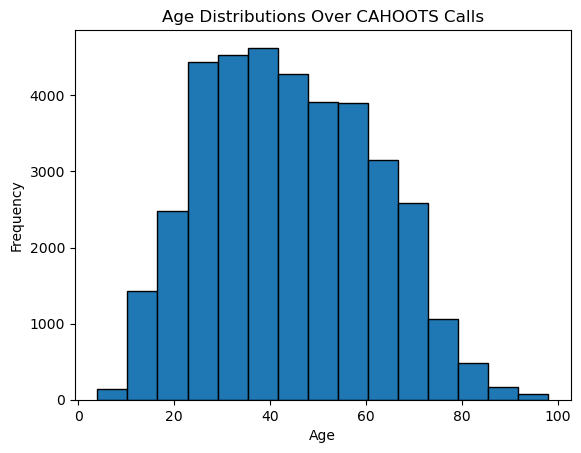

In [23]:
# making sure all the values are int type
CAHOOTS_age_all_cleaned['Age'] = CAHOOTS_age_all_cleaned['Age'].astype(int)

ages = CAHOOTS_age_all_cleaned["Age"]

plt.hist(ages, bins=15, edgecolor="black")
plt.title('Age Distributions Over CAHOOTS Calls')
plt.xlabel('Age')
plt.ylabel('Frequency') 

# Age and Reason For Dispatch Dataframe

In [18]:
# now making a dataset for age over the call classes

CAHOOTS_dispatch_and_age = CAHOOTS_call_data.drop(["Date", "TimeOfCall", "Gender", "Race", "Language", "City"], axis=1)

In [19]:
CAHOOTS_dispatch_and_age

,Age,Reason for Dispatch
0,46,Public Assist
1,55,Public Assist
2,Unavailable,Public Assist
3,81,Transport
4,51,Check Welfare
...,...,...
67516,NaN,NaN
67517,NaN,NaN
67518,NaN,NaN
67519,NaN,NaN


In [20]:
# running data through the same age cleaning as above

# now dropping the values of "Not Given" 
    # https://saturncloud.io/blog/how-to-remove-rows-with-specific-values-in-pandas-dataframe/#:~:text=Method%202%3A%20Using%20the%20drop,value%20we%20want%20to%20remove.
    # # drop all rows that contain 'Coca Cola'
    # df = df.drop(df[df['product_name'] == 'Coca Cola'].index)
CAHOOTS_dispatch_and_age_cleaned = CAHOOTS_dispatch_and_age.drop(CAHOOTS_dispatch_and_age[CAHOOTS_dispatch_and_age["Age"].isin(["Not Given", "Unavailable", "nan"])].index)

# checking to make sure the rest of the values are just numbers
CAHOOTS_dispatch_and_age_cleaned["Age"].unique()

# also need to get rid of instances of normal python recognized nan values
CAHOOTS_dispatch_and_age_cleaned = CAHOOTS_dispatch_and_age_cleaned.dropna()

# checking again to make sure the rest of the values are just numbers
    #CAHOOTS_dispatch_and_age_cleaned["Age"].unique()
    
CAHOOTS_dispatch_and_age_cleaned

,Age,Reason for Dispatch
0,46,Public Assist
1,55,Public Assist
3,81,Transport
4,51,Check Welfare
5,47,Check Welfare
...,...,...
66457,74,Public Assist
66459,47,Check Welfare
66460,47,Suicidal Subject
66461,39,Check Welfare


In [21]:
# now cleaning the dispatch portion of data
CAHOOTS_dispatch_cleaned_and_age_cleaned = CAHOOTS_dispatch_and_age_cleaned.drop(
    CAHOOTS_dispatch_and_age_cleaned[CAHOOTS_dispatch_and_age_cleaned["Reason for Dispatch"] == "Information Not Available"].index
)

# making sure the dispatch portion doesn't have any unexpected values
CAHOOTS_dispatch_cleaned_and_age_cleaned["Reason for Dispatch"].unique()

# making sure all the values are int type
CAHOOTS_dispatch_cleaned_and_age_cleaned['Age'] = CAHOOTS_dispatch_cleaned_and_age_cleaned['Age'].astype(int)

# finalized cleaned cahoots reason for dispatch and age dataframe
CAHOOTS_dispatch_cleaned_and_age_cleaned

,Age,Reason for Dispatch
0,46,Public Assist
1,55,Public Assist
3,81,Transport
4,51,Check Welfare
5,47,Check Welfare
...,...,...
66457,74,Public Assist
66459,47,Check Welfare
66460,47,Suicidal Subject
66461,39,Check Welfare


In [22]:
# Define age groups
bins_call_types = [0, 18, 35, 50, 65, 100]
labels_call_types = ['0-18', '19-35', '36-50', '51-65', '66+']
CAHOOTS_dispatch_cleaned_and_age_cleaned['Age Group'] = pd.cut(CAHOOTS_dispatch_cleaned_and_age_cleaned['Age'], bins=bins_call_types, labels=labels_call_types, right=False)

CAHOOTS_dispatch_cleaned_and_age_cleaned

,Age,Reason for Dispatch,Age Group
0,46,Public Assist,36-50
1,55,Public Assist,51-65
3,81,Transport,66+
4,51,Check Welfare,51-65
5,47,Check Welfare,36-50
...,...,...,...
66457,74,Public Assist,66+
66459,47,Check Welfare,36-50
66460,47,Suicidal Subject,36-50
66461,39,Check Welfare,36-50


In [23]:
# Calculate mean age for each reason for dispatch
mean_ages = CAHOOTS_dispatch_cleaned_and_age_cleaned.groupby('Reason for Dispatch')['Age'].mean()

# Print the mean ages
mean_ages


Reason for Dispatch
Check Welfare       45.495078
Counseling          41.483333
EMS Assist          41.939655
Fire Assist         47.152709
Police Assist       39.941305
Public Assist       44.687738
Suicidal Subject    37.538992
Transport           45.824681
Name: Age, dtype: float64

In [24]:
# Calculate MSE for proportions
def calculate_mse(proportions):
    mse_matrix = np.zeros((len(proportions), len(proportions)))
    for i in range(len(proportions)):
        for j in range(len(proportions)):
            mse_matrix[i, j] = np.mean((proportions[i] - proportions[j]) ** 2)
    return mse_matrix

/var/folders/48/72hxbzzj791_c7th7nv0p31h0000gn/T/ipykernel_73621/2398579580.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dispatch_age_counts = CAHOOTS_dispatch_cleaned_and_age_cleaned.groupby(['Reason for Dispatch', 'Age Group']).size().reset_index(name='Counts')


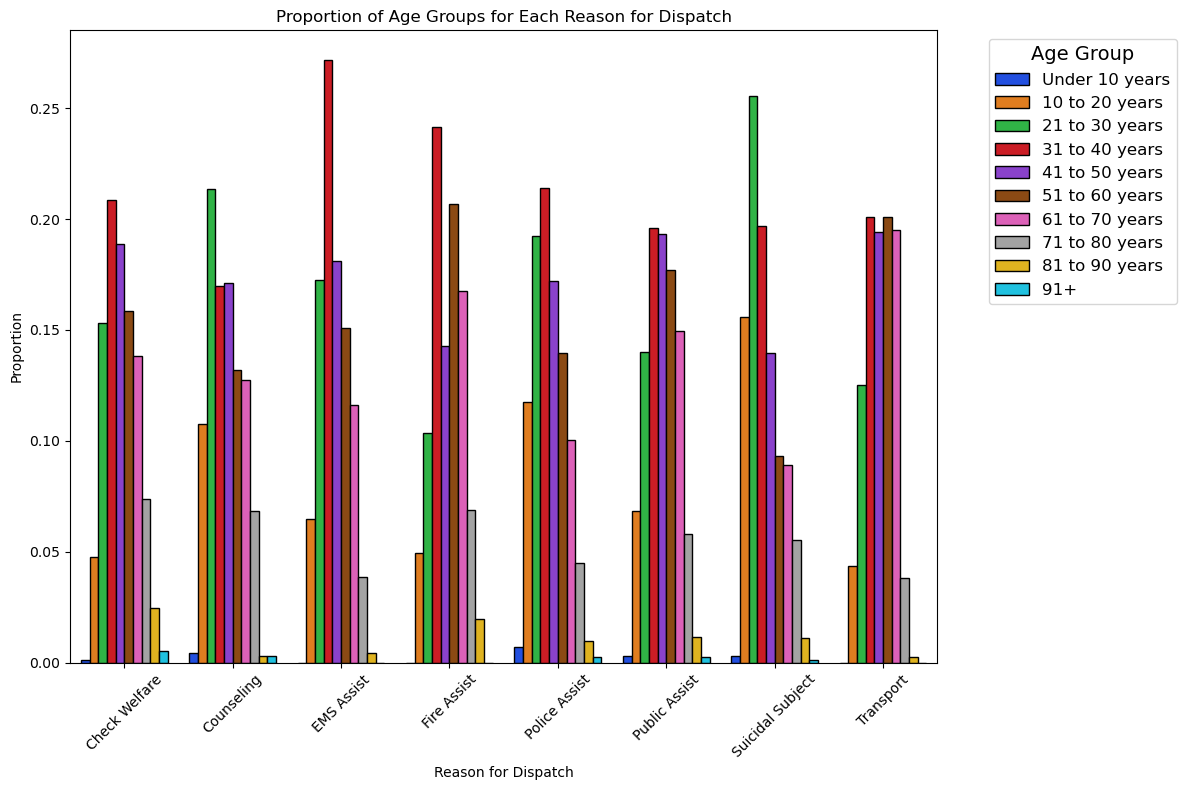

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'CAHOOTS_dispatch_cleaned_and_age_cleaned' is your DataFrame

# Convert 'Age' column to numeric type, handling non-numeric values by converting them to NaN
CAHOOTS_dispatch_cleaned_and_age_cleaned['Age'] = pd.to_numeric(CAHOOTS_dispatch_cleaned_and_age_cleaned['Age'], errors='coerce')

# Define age groups
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['Under 10 years', '10 to 20 years',
              '21 to 30 years', '31 to 40 years', 
              '41 to 50 years', '51 to 60 years',
              '61 to 70 years', '71 to 80 years', 
              '81 to 90 years', '91+']

# Create a new column 'Age Group' based on the custom age groups
CAHOOTS_dispatch_cleaned_and_age_cleaned['Age Group'] = pd.cut(CAHOOTS_dispatch_cleaned_and_age_cleaned['Age'], bins=age_bins, labels=age_labels, right=False)

# Group data by 'Reason for Dispatch' and 'Age Group', and count occurrences
dispatch_age_counts = CAHOOTS_dispatch_cleaned_and_age_cleaned.groupby(['Reason for Dispatch', 'Age Group']).size().reset_index(name='Counts')

# Calculate the total counts for each 'Reason for Dispatch'
total_counts = CAHOOTS_dispatch_cleaned_and_age_cleaned['Reason for Dispatch'].value_counts().reset_index()
total_counts.columns = ['Reason for Dispatch', 'Total Counts']

# Merge total counts with the dispatch_age_counts
dispatch_age_counts = pd.merge(dispatch_age_counts, total_counts, on='Reason for Dispatch')

# Calculate the proportion of each age group within each dispatch reason
dispatch_age_counts['Proportion'] = dispatch_age_counts['Counts'] / dispatch_age_counts['Total Counts']

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=dispatch_age_counts, x='Reason for Dispatch', y='Proportion', hue='Age Group', edgecolor="black", palette="bright")
plt.title('Proportion of Age Groups for Each Reason for Dispatch')
plt.xlabel('Reason for Dispatch')
plt.ylabel('Proportion')
plt.xticks(rotation=45) 
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()


Text(50.72222222222221, 0.5, 'Reason for Dispatch')

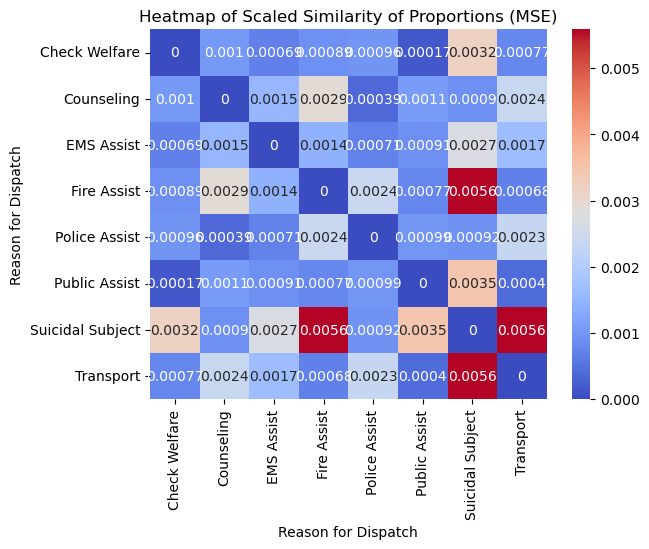

In [26]:
# pivoting the DataFrame to get proportions for each reason for dispatch
proportions_dispatch = dispatch_age_counts.pivot(index='Reason for Dispatch', columns='Age Group', values='Proportion').fillna(0).values

# calc MSE for proportions between reasons for dispatch
mse_matrix_dispatch = calculate_mse(proportions_dispatch)

reasons_for_dispatch = dispatch_age_counts['Reason for Dispatch'].unique()
sns.heatmap(mse_matrix_dispatch, xticklabels=reasons_for_dispatch, yticklabels=reasons_for_dispatch, cmap='coolwarm', annot=True)
plt.title('Heatmap of Scaled Similarity of Proportions (MSE)')
plt.xlabel('Reason for Dispatch')
plt.ylabel('Reason for Dispatch')

# Age and City Dataframe

In [28]:
# making one more dataframe to include age and city

CAHOOTS_age_and_city = CAHOOTS_call_data.drop(["Date", "TimeOfCall", "Gender", "Race","Language","Reason for Dispatch"], axis=1)

# running data through the same age cleaning as above

# now dropping the values of "Not Given" 
    # https://saturncloud.io/blog/how-to-remove-rows-with-specific-values-in-pandas-dataframe/#:~:text=Method%202%3A%20Using%20the%20drop,value%20we%20want%20to%20remove.
    # # drop all rows that contain 'Coca Cola'
    # df = df.drop(df[df['product_name'] == 'Coca Cola'].index)
CAHOOTS_age_and_city_cleaned = CAHOOTS_age_and_city.drop(CAHOOTS_age_and_city[CAHOOTS_age_and_city["Age"].isin(["Not Given", "Unavailable", "nan"])].index)

# checking to make sure the rest of the values are just numbers
    #CAHOOTS_age_and_city_cleaned["Age"].unique()

# also need to get rid of instances of normal python recognized nan values
CAHOOTS_age_and_city_cleaned = CAHOOTS_age_and_city_cleaned.dropna()

# checking again to make sure the rest of the values are just numbers
    #CAHOOTS_dispatch_and_age_cleaned["Age"].unique()
    
CAHOOTS_age_and_city_cleaned


,Age,City
0,46,Eugene
1,55,Eugene
3,81,Eugene
4,51,Eugene
5,47,Eugene
...,...,...
66457,74,Informatio not recorded
66459,47,Eugene
66460,47,Informatio not recorded
66461,39,Informatio not recorded


In [29]:
# now cleaning for city 
    # df = df.drop(df[df['product_name'] == 'Coca Cola'].index)
CAHOOTS_age_and_city_cleaned = CAHOOTS_age_and_city_cleaned.drop(CAHOOTS_age_and_city_cleaned[CAHOOTS_age_and_city_cleaned["City"] == 'Informatio not recorded'].index)

CAHOOTS_age_and_city_cleaned

,Age,City
0,46,Eugene
1,55,Eugene
3,81,Eugene
4,51,Eugene
5,47,Eugene
...,...,...
66448,41,Eugene
66454,27,Eugene
66455,44,Eugene
66459,47,Eugene


In [30]:
# Group the data by the 'City' column
grouped = CAHOOTS_age_and_city_cleaned.groupby('City')

# Get the DataFrame for Eugene
eugene_df = grouped.get_group('Eugene')

# Get the DataFrame for Springfield
springfield_df = grouped.get_group('Springfield')

In [53]:
eugene_df

,Age,City
0,46,Eugene
1,55,Eugene
3,81,Eugene
4,51,Eugene
5,47,Eugene
...,...,...
66448,41,Eugene
66454,27,Eugene
66455,44,Eugene
66459,47,Eugene


In [55]:
# exporting the eugene CAHOOTS data as a csv file
eugene_df.to_csv('cahoots_age_ks.csv', index=False)

In [57]:
springfield_df

,Age,City
14,65,Springfield
16,62,Springfield
20,66,Springfield
26,55,Springfield
32,25,Springfield
...,...,...
66402,59,Springfield
66418,62,Springfield
66431,22,Springfield
66446,37,Springfield


In [59]:
# exporting the eugene springfield data as a csv file
springfield_df.to_csv('cahoots_age_sp_ks.csv', index=False)

# Changing Eugene CAHOOTS data into same format as ACS data

In [32]:
# Getting data into same format as below

# Define age group bins
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, float('inf')]
# Define age group labels
labels = ['Under 5 years', '5 to 9 years', '10 to 14 years', '15 to 19 years', '20 to 24 years', '25 to 29 years', 
          '30 to 34 years', '35 to 39 years', '40 to 44 years', '45 to 49 years', '50 to 54 years', '55 to 59 years', 
          '60 to 64 years', '65 to 69 years', '70 to 74 years', '75 to 79 years', '80 to 84 years', '85 years and over']

# making sure the ages are nums
eugene_df['Age'] = eugene_df['Age'].astype(int)

# Add a new column 'Age Group' to the DataFrame based on age bins
eugene_df['Age Group'] = pd.cut(eugene_df['Age'], bins=bins, labels=labels, right=False, include_lowest=True)

# Group by 'Age Group' and count occurrences
age_group_totals_eugene = eugene_df.groupby('Age Group').size().reset_index(name='Age Group Totals')

# Reset index
age_group_totals_eugene.reset_index(drop=True, inplace=True)



age_group_totals_eugene

/var/folders/48/72hxbzzj791_c7th7nv0p31h0000gn/T/ipykernel_73081/2020265937.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eugene_df['Age'] = eugene_df['Age'].astype(int)
/var/folders/48/72hxbzzj791_c7th7nv0p31h0000gn/T/ipykernel_73081/2020265937.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eugene_df['Age Group'] = pd.cut(eugene_df['Age'], bins=bins, labels=labels, right=False, include_lowest=True)
/var/folders/48/72hxbzzj791_c7th7nv0p31h0000gn/T/ipykernel_73081/2020265937.py:17: FutureWarning

,Age Group,Age Group Totals
0,Under 5 years,2
1,5 to 9 years,62
2,10 to 14 years,444
3,15 to 19 years,1110
4,20 to 24 years,1883
5,25 to 29 years,2322
6,30 to 34 years,2626
7,35 to 39 years,2833
8,40 to 44 years,2550
9,45 to 49 years,2486


# exporting the eugene CAHOOTS data as a csv file


In [34]:
# exporting the eugene CAHOOTS data as a csv file
age_group_totals_eugene.to_csv('cahoots_age_eugene.csv', index=False)

# Changing Springfield CAHOOTS data into same format as ACS

In [36]:
# Define age group bins
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, float('inf')]
# Define age group labels
labels = ['Under 5 years', '5 to 9 years', '10 to 14 years', '15 to 19 years', '20 to 24 years', '25 to 29 years', 
          '30 to 34 years', '35 to 39 years', '40 to 44 years', '45 to 49 years', '50 to 54 years', '55 to 59 years', 
          '60 to 64 years', '65 to 69 years', '70 to 74 years', '75 to 79 years', '80 to 84 years', '85 years and over']

# making sure the ages are nums
springfield_df['Age'] = springfield_df['Age'].astype(int)

# Add a new column 'Age Group' to the DataFrame based on age bins
springfield_df['Age Group'] = pd.cut(springfield_df['Age'], bins=bins, labels=labels, right=False, include_lowest=True)

# Group by 'Age Group' and count occurrences
age_group_totals_sp = springfield_df.groupby('Age Group').size().reset_index(name='Age Group Totals')

# Reset index
age_group_totals_sp.reset_index(drop=True, inplace=True)

age_group_totals_sp

/var/folders/48/72hxbzzj791_c7th7nv0p31h0000gn/T/ipykernel_73081/3634981567.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  springfield_df['Age'] = springfield_df['Age'].astype(int)
/var/folders/48/72hxbzzj791_c7th7nv0p31h0000gn/T/ipykernel_73081/3634981567.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  springfield_df['Age Group'] = pd.cut(springfield_df['Age'], bins=bins, labels=labels, right=False, include_lowest=True)
/var/folders/48/72hxbzzj791_c7th7nv0p31h0000gn/T/ipykernel_73081/3634981567.p

,Age Group,Age Group Totals
0,Under 5 years,1
1,5 to 9 years,32
2,10 to 14 years,338
3,15 to 19 years,668
4,20 to 24 years,639
5,25 to 29 years,861
6,30 to 34 years,924
7,35 to 39 years,1067
8,40 to 44 years,1007
9,45 to 49 years,798


# exporting the Springfield CAHOOTS data as a csv file


In [38]:
# exporting the springifield CAHOOTS data as a csv file
age_group_totals_sp.to_csv('cahoots_age_springfield.csv', index=False)

# Visualization of Age Distributions Across Cities (CAHOOTS)

/var/folders/48/72hxbzzj791_c7th7nv0p31h0000gn/T/ipykernel_73081/3052291277.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dispatch_age_counts = CAHOOTS_age_and_city_cleaned.groupby(['City', 'Age Group']).size().reset_index(name='Counts')


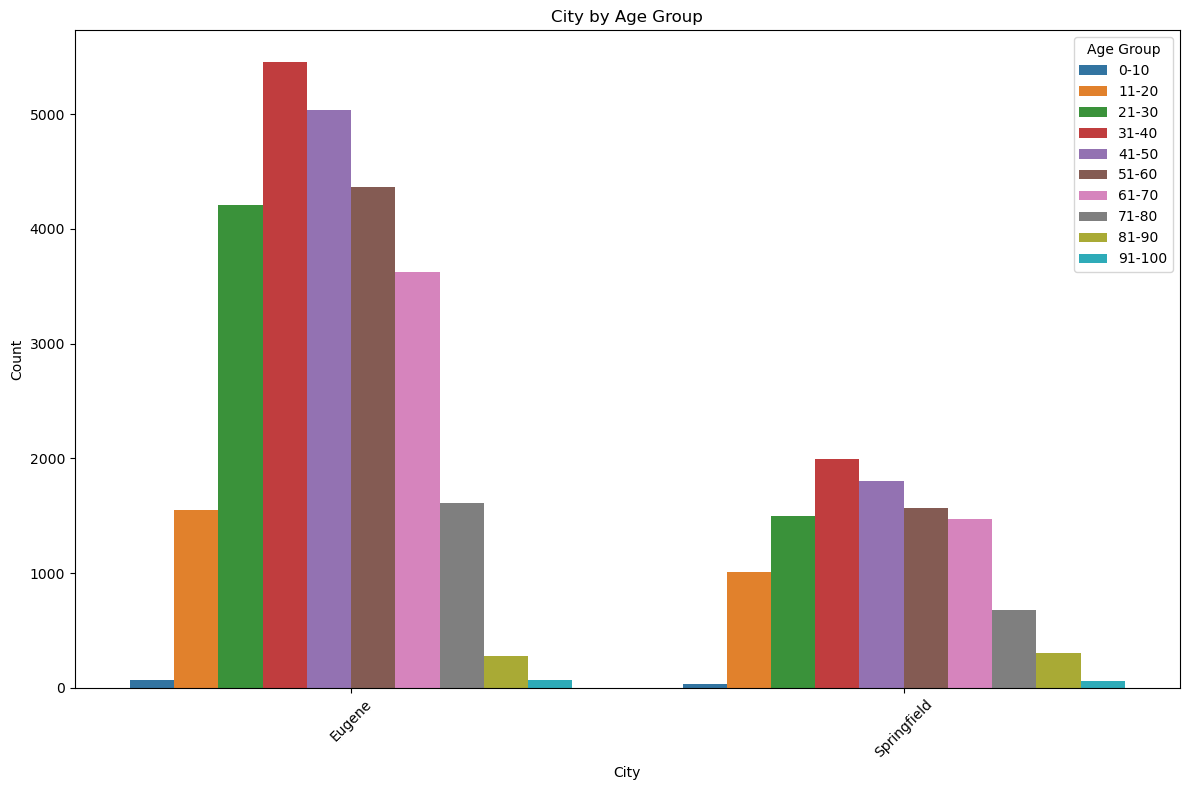

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Age' column to integer type
CAHOOTS_age_and_city_cleaned['Age'] = pd.to_numeric(CAHOOTS_age_and_city_cleaned['Age'], errors='coerce')  # 'coerce' will convert non-numeric values to NaN

# Define custom age groups
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-10', '11-20', '21-30', '31-40','41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Create a new column 'Age Group' based on the custom age groups
CAHOOTS_age_and_city_cleaned['Age Group'] = pd.cut(CAHOOTS_age_and_city_cleaned['Age'], bins=age_bins, labels=age_labels, right=False)

# Group data by 'Reason for Dispatch' and 'Age Group', and count occurrences
dispatch_age_counts = CAHOOTS_age_and_city_cleaned.groupby(['City', 'Age Group']).size().reset_index(name='Counts')

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=dispatch_age_counts, x='City', y='Counts', hue='Age Group')
plt.title('City by Age Group')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()


# Importing ACS data

In [42]:
eugene_acs = pd.read_csv("ACS_eugene_5yr.csv")
eugene_acs.head()

,Label (Grouping),"Eugene city, Oregon!!Total!!Estimate","Eugene city, Oregon!!Total!!Margin of Error","Eugene city, Oregon!!Percent!!Estimate","Eugene city, Oregon!!Percent!!Margin of Error","Eugene city, Oregon!!Male!!Estimate","Eugene city, Oregon!!Male!!Margin of Error","Eugene city, Oregon!!Percent Male!!Estimate","Eugene city, Oregon!!Percent Male!!Margin of Error","Eugene city, Oregon!!Female!!Estimate","Eugene city, Oregon!!Female!!Margin of Error","Eugene city, Oregon!!Percent Female!!Estimate","Eugene city, Oregon!!Percent Female!!Margin of Error"
0,Total population,"176,755",±67,(X),(X),"86,169","±1,040",(X),(X),"90,586","±1,048",(X),(X)
1,AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Under 5 years,"7,065",±507,4.0%,±0.3,"3,754",±365,4.4%,±0.4,"3,311",±375,3.7%,±0.4
3,5 to 9 years,"7,641",±604,4.3%,±0.3,"3,758",±407,4.4%,±0.5,"3,883",±375,4.3%,±0.4
4,10 to 14 years,"8,602",±755,4.9%,±0.4,"4,230",±492,4.9%,±0.6,"4,372",±491,4.8%,±0.5


In [43]:
springfield_acs = pd.read_csv("springfield_age_and_sex_data_census.csv")
springfield_acs.head()

,Label (Grouping),"Springfield city, Oregon!!Total!!Estimate","Springfield city, Oregon!!Total!!Margin of Error","Springfield city, Oregon!!Percent!!Estimate","Springfield city, Oregon!!Percent!!Margin of Error","Springfield city, Oregon!!Male!!Estimate","Springfield city, Oregon!!Male!!Margin of Error","Springfield city, Oregon!!Percent Male!!Estimate","Springfield city, Oregon!!Percent Male!!Margin of Error","Springfield city, Oregon!!Female!!Estimate","Springfield city, Oregon!!Female!!Margin of Error","Springfield city, Oregon!!Percent Female!!Estimate","Springfield city, Oregon!!Percent Female!!Margin of Error"
0,Total population,"61,740",±50,(X),(X),"31,351",±767,(X),(X),"30,389",±770,(X),(X)
1,AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Under 5 years,"3,455",±438,5.6%,±0.7,"2,011",±362,6.4%,±1.1,"1,444",±234,4.8%,±0.8
3,5 to 9 years,"3,551",±357,5.8%,±0.6,"1,954",±311,6.2%,±1.0,"1,597",±264,5.3%,±0.9
4,10 to 14 years,"3,838",±437,6.2%,±0.7,"2,023",±334,6.5%,±1.0,"1,815",±300,6.0%,±1.0


# Cleaning Eugene ACS Data

In [45]:
eugene_acs.head()

,Label (Grouping),"Eugene city, Oregon!!Total!!Estimate","Eugene city, Oregon!!Total!!Margin of Error","Eugene city, Oregon!!Percent!!Estimate","Eugene city, Oregon!!Percent!!Margin of Error","Eugene city, Oregon!!Male!!Estimate","Eugene city, Oregon!!Male!!Margin of Error","Eugene city, Oregon!!Percent Male!!Estimate","Eugene city, Oregon!!Percent Male!!Margin of Error","Eugene city, Oregon!!Female!!Estimate","Eugene city, Oregon!!Female!!Margin of Error","Eugene city, Oregon!!Percent Female!!Estimate","Eugene city, Oregon!!Percent Female!!Margin of Error"
0,Total population,"176,755",±67,(X),(X),"86,169","±1,040",(X),(X),"90,586","±1,048",(X),(X)
1,AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Under 5 years,"7,065",±507,4.0%,±0.3,"3,754",±365,4.4%,±0.4,"3,311",±375,3.7%,±0.4
3,5 to 9 years,"7,641",±604,4.3%,±0.3,"3,758",±407,4.4%,±0.5,"3,883",±375,4.3%,±0.4
4,10 to 14 years,"8,602",±755,4.9%,±0.4,"4,230",±492,4.9%,±0.6,"4,372",±491,4.8%,±0.5


In [46]:
eugene_acs.columns

Index(['Label (Grouping)', 'Eugene city, Oregon!!Total!!Estimate',
       'Eugene city, Oregon!!Total!!Margin of Error',
       'Eugene city, Oregon!!Percent!!Estimate',
       'Eugene city, Oregon!!Percent!!Margin of Error',
       'Eugene city, Oregon!!Male!!Estimate',
       'Eugene city, Oregon!!Male!!Margin of Error',
       'Eugene city, Oregon!!Percent Male!!Estimate',
       'Eugene city, Oregon!!Percent Male!!Margin of Error',
       'Eugene city, Oregon!!Female!!Estimate',
       'Eugene city, Oregon!!Female!!Margin of Error',
       'Eugene city, Oregon!!Percent Female!!Estimate',
       'Eugene city, Oregon!!Percent Female!!Margin of Error'],
      dtype='object')

In [47]:
# keeping only columns of age breakdown 
eugene_acs = eugene_acs.loc[:, ['Label (Grouping)',"Eugene city, Oregon!!Total!!Estimate"]]


In [48]:
eugene_acs = eugene_acs.drop(eugene_acs.index[20:42])

In [49]:
eugene_acs = eugene_acs.rename(columns={"Label (Grouping)": "Age Groups", "Eugene city, Oregon!!Total!!Estimate":"Age Group Totals"})
                                        
                                        
                                     

In [50]:
data = {
    'Age Groups': ['Total population', 'Under 5 years', '5 to 9 years', '10 to 14 years', 
                   '15 to 19 years', '20 to 24 years', '25 to 29 years', '30 to 34 years', 
                   '35 to 39 years', '40 to 44 years', '45 to 49 years', '50 to 54 years', 
                   '55 to 59 years', '60 to 64 years', '65 to 69 years', '70 to 74 years', 
                   '75 to 79 years', '80 to 84 years', '85 years and over'],
    'Age Group Totals': [177930, 6878, 7685, 7316, 14930, 24115, 
                         16338, 11558, 9825, 10579, 8296, 9854, 7098, 
                         9356, 10318, 9423, 6729, 4343, 3289]
}

# Create DataFrame
eugene_acs_cleaned = pd.DataFrame(data)

# Display tidy data
eugene_acs_cleaned

eugene_acs_cleaned = eugene_acs_cleaned.drop(eugene_acs_cleaned.index[0])
eugene_acs_cleaned

,Age Groups,Age Group Totals
1,Under 5 years,6878
2,5 to 9 years,7685
3,10 to 14 years,7316
4,15 to 19 years,14930
5,20 to 24 years,24115
6,25 to 29 years,16338
7,30 to 34 years,11558
8,35 to 39 years,9825
9,40 to 44 years,10579
10,45 to 49 years,8296


# exporting the eugene ACS data as a csv file


In [52]:
eugene_acs_cleaned.to_csv('acs_5_yr_age_eugene.csv', index=False)

# Eugene ACS barplot

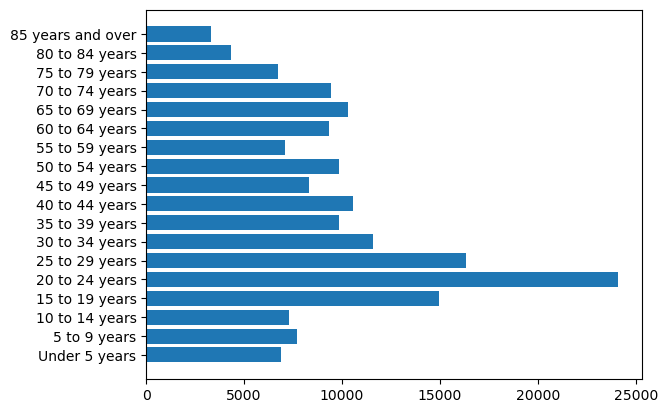

In [54]:
eugene_acs_hist = plt.barh(eugene_acs_cleaned["Age Groups"], eugene_acs_cleaned["Age Group Totals"])

# CAHOOTS Eugene barplot

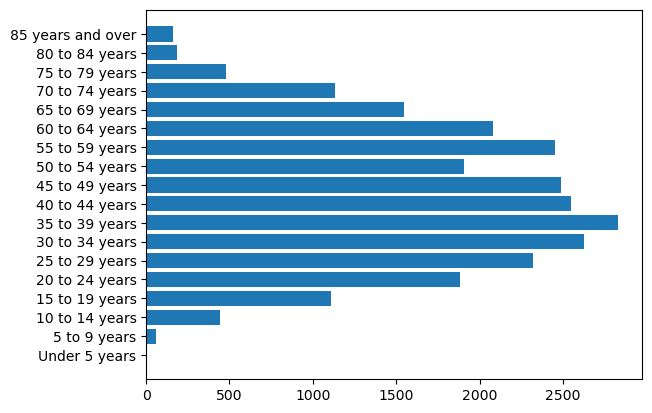

In [56]:
CAHOOTS_eugene_hist = plt.barh(age_group_totals_eugene["Age Group"], age_group_totals_eugene["Age Group Totals"])

# Cleaning Springfield ACS Data

In [58]:
springfield_acs = springfield_acs.loc[:, ['Label (Grouping)',"Springfield city, Oregon!!Total!!Estimate"]]
springfield_acs = springfield_acs.drop(springfield_acs.index[20:42])
springfield_acs = springfield_acs.rename(columns={"Label (Grouping)": "Age Groups", "Springfield city, Oregon!!Total!!Estimate":"Age Group Totals"})


In [59]:
springfield_acs

,Age Groups,Age Group Totals
0,Total population,"61,740"
1,AGE,NaN
2,Under 5 years,"3,455"
3,5 to 9 years,"3,551"
4,10 to 14 years,"3,838"
5,15 to 19 years,"3,685"
6,20 to 24 years,"4,908"
7,25 to 29 years,"4,257"
8,30 to 34 years,"4,749"
9,35 to 39 years,"4,574"


In [60]:
sp_data = {
    'Age Groups': ['Total population', 'Under 5 years', '5 to 9 years', '10 to 14 years', 
                   '15 to 19 years', '20 to 24 years', '25 to 29 years', '30 to 34 years', 
                   '35 to 39 years', '40 to 44 years', '45 to 49 years', '50 to 54 years', 
                   '55 to 59 years', '60 to 64 years', '65 to 69 years', '70 to 74 years', 
                   '75 to 79 years', '80 to 84 years', '85 years and over'],
    'Age Group Totals': [61740, 3455, 3551, 3838, 3685, 4908, 
                         4257, 4749, 4574, 3664, 3925, 3828, 3969, 
                         3645, 3237, 2709, 1580, 943, 1223]
}

# Create DataFrame
springfield_acs_cleaned = pd.DataFrame(sp_data)
springfield_acs_cleaned = springfield_acs_cleaned.drop(springfield_acs_cleaned.index[0])

springfield_acs_cleaned

,Age Groups,Age Group Totals
1,Under 5 years,3455
2,5 to 9 years,3551
3,10 to 14 years,3838
4,15 to 19 years,3685
5,20 to 24 years,4908
6,25 to 29 years,4257
7,30 to 34 years,4749
8,35 to 39 years,4574
9,40 to 44 years,3664
10,45 to 49 years,3925


# springfield ACS data to csv

In [62]:
springfield_acs_cleaned.to_csv('acs_age_sprinfield.csv', index=False)

# Springfield ACS barplot

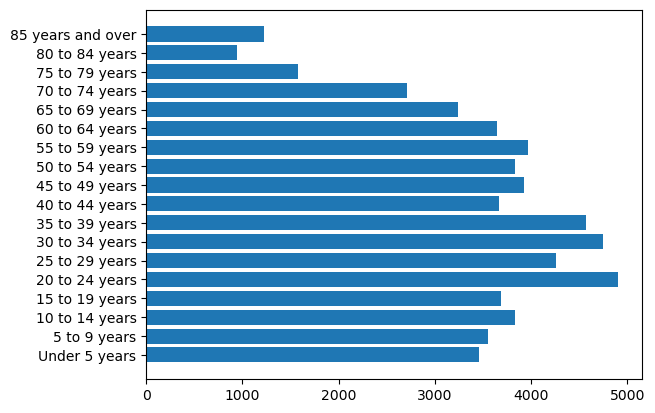

In [64]:
springfield_acs_hist = plt.barh(springfield_acs_cleaned["Age Groups"], springfield_acs_cleaned["Age Group Totals"])

# CAHOOTS Springfield Barplot

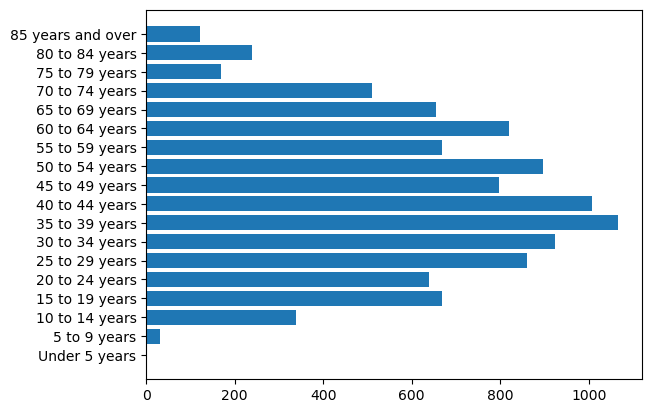

In [66]:
CAHOOTS_springfield_hist = plt.barh(age_group_totals_sp["Age Group"], age_group_totals_sp["Age Group Totals"])

In [67]:
# export the cleaned datasets as csvs and then upload to r to run the stat test
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html

